In [62]:
import pandas as pd 
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv")
print(df.columns)

display(df.head(10))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

Сегментация пациентов по рискам сердечно-сосудистых заболеваний
Цель: Определить группы пациентов с различными уровнями риска развития сердечно-сосудистых заболеваний на основе их демографических данных, образа жизни и состояния здоровья.

Пример:

Кластер 1: Пациенты с высоким риском (курение, высокий ИМТ, низкая физическая активность).

Кластер 2: Пациенты со средним риском (умеренное курение, средний ИМТ, средняя физическая активность).

Кластер 3: Пациенты с низким риском (отсутствие вредных привычек, нормальный ИМТ, высокая физическая активность).

Бизнес-применение:

Разработка персонализированных программ профилактики и лечения для каждой группы пациентов.

Таргетированная реклама медицинских услуг и продуктов для улучшения образа жизни.

In [63]:
import pandas as pd

df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(1000)
df = df.dropna()
from scipy import stats

z_scores = stats.zscore(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_resampled, y_resampled = ros.fit_resample(X, y)

df_balanced = X_resampled.copy()
df_balanced['HeartDisease'] = y_resampled

df = df_balanced


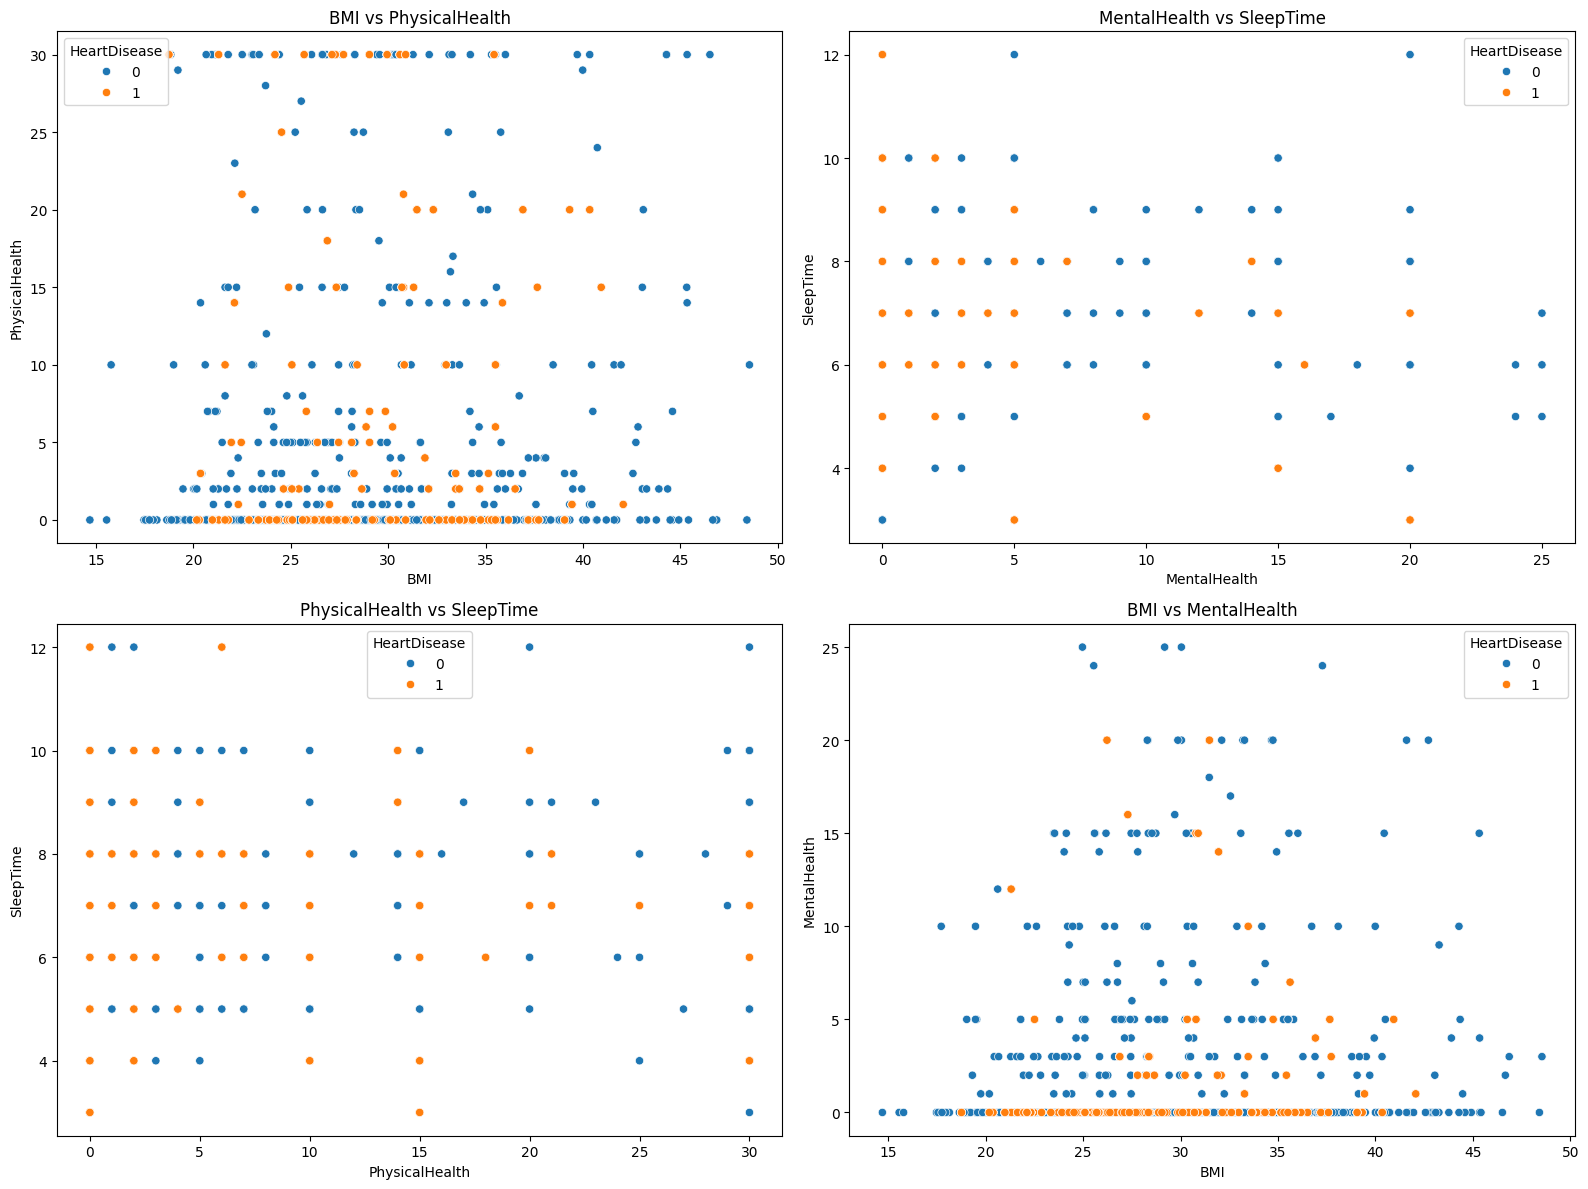

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs PhysicalHealth')

plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('MentalHealth vs SleepTime')

plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('PhysicalHealth vs SleepTime')

plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

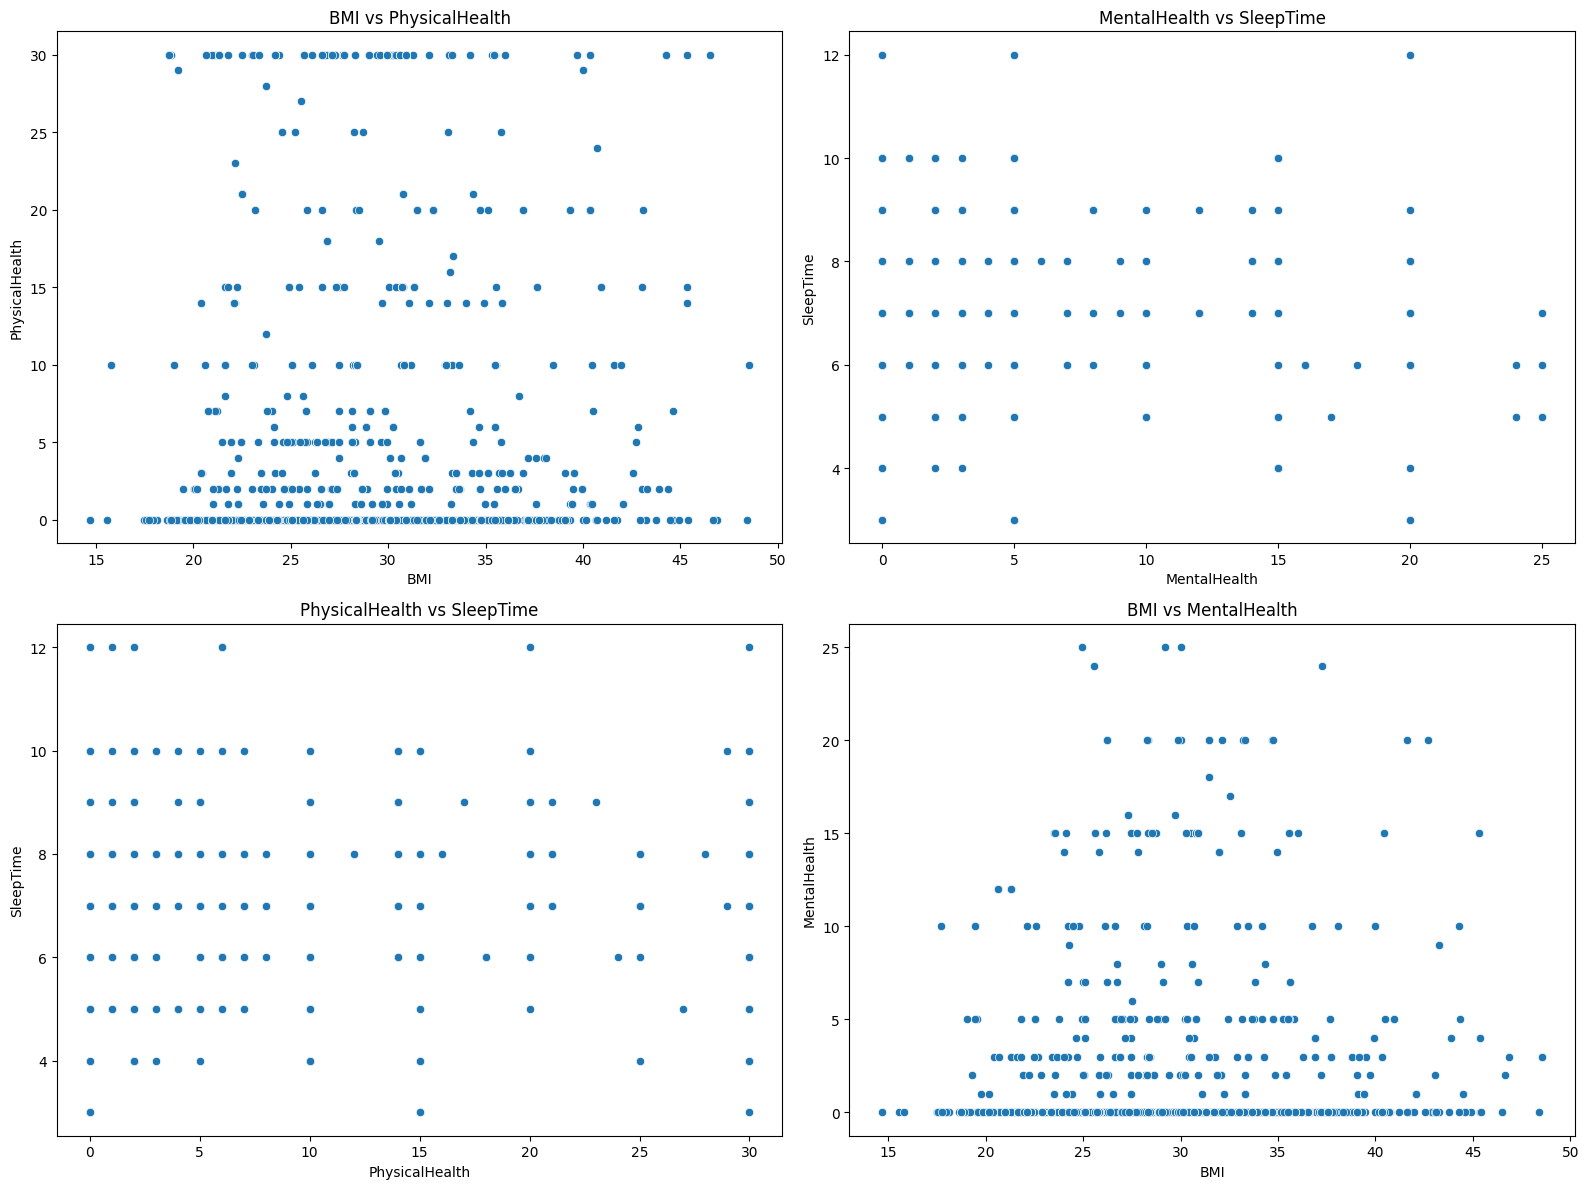

In [65]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', data=df)
plt.title('BMI vs PhysicalHealth')

plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', data=df)
plt.title('MentalHealth vs SleepTime')

plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', data=df)
plt.title('PhysicalHealth vs SleepTime')

plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

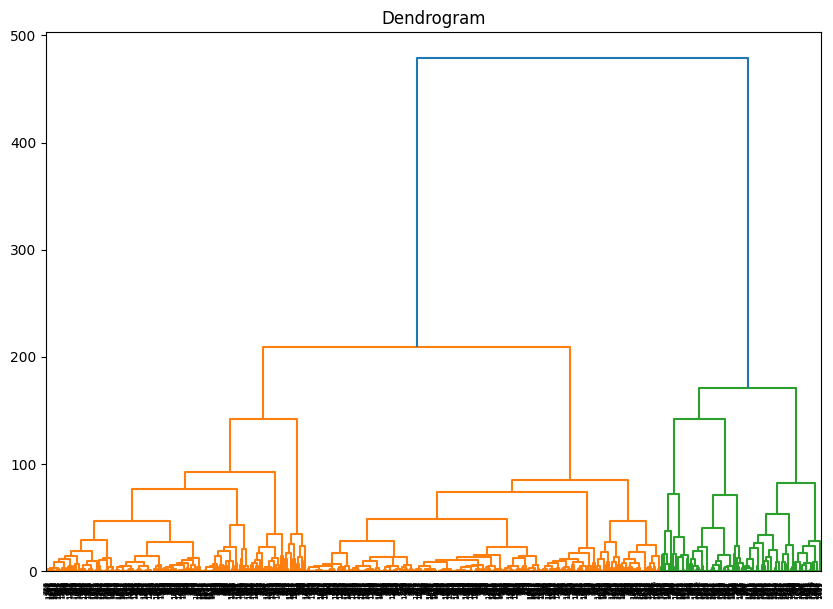

In [66]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X)

df['Cluster'] = clusters

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

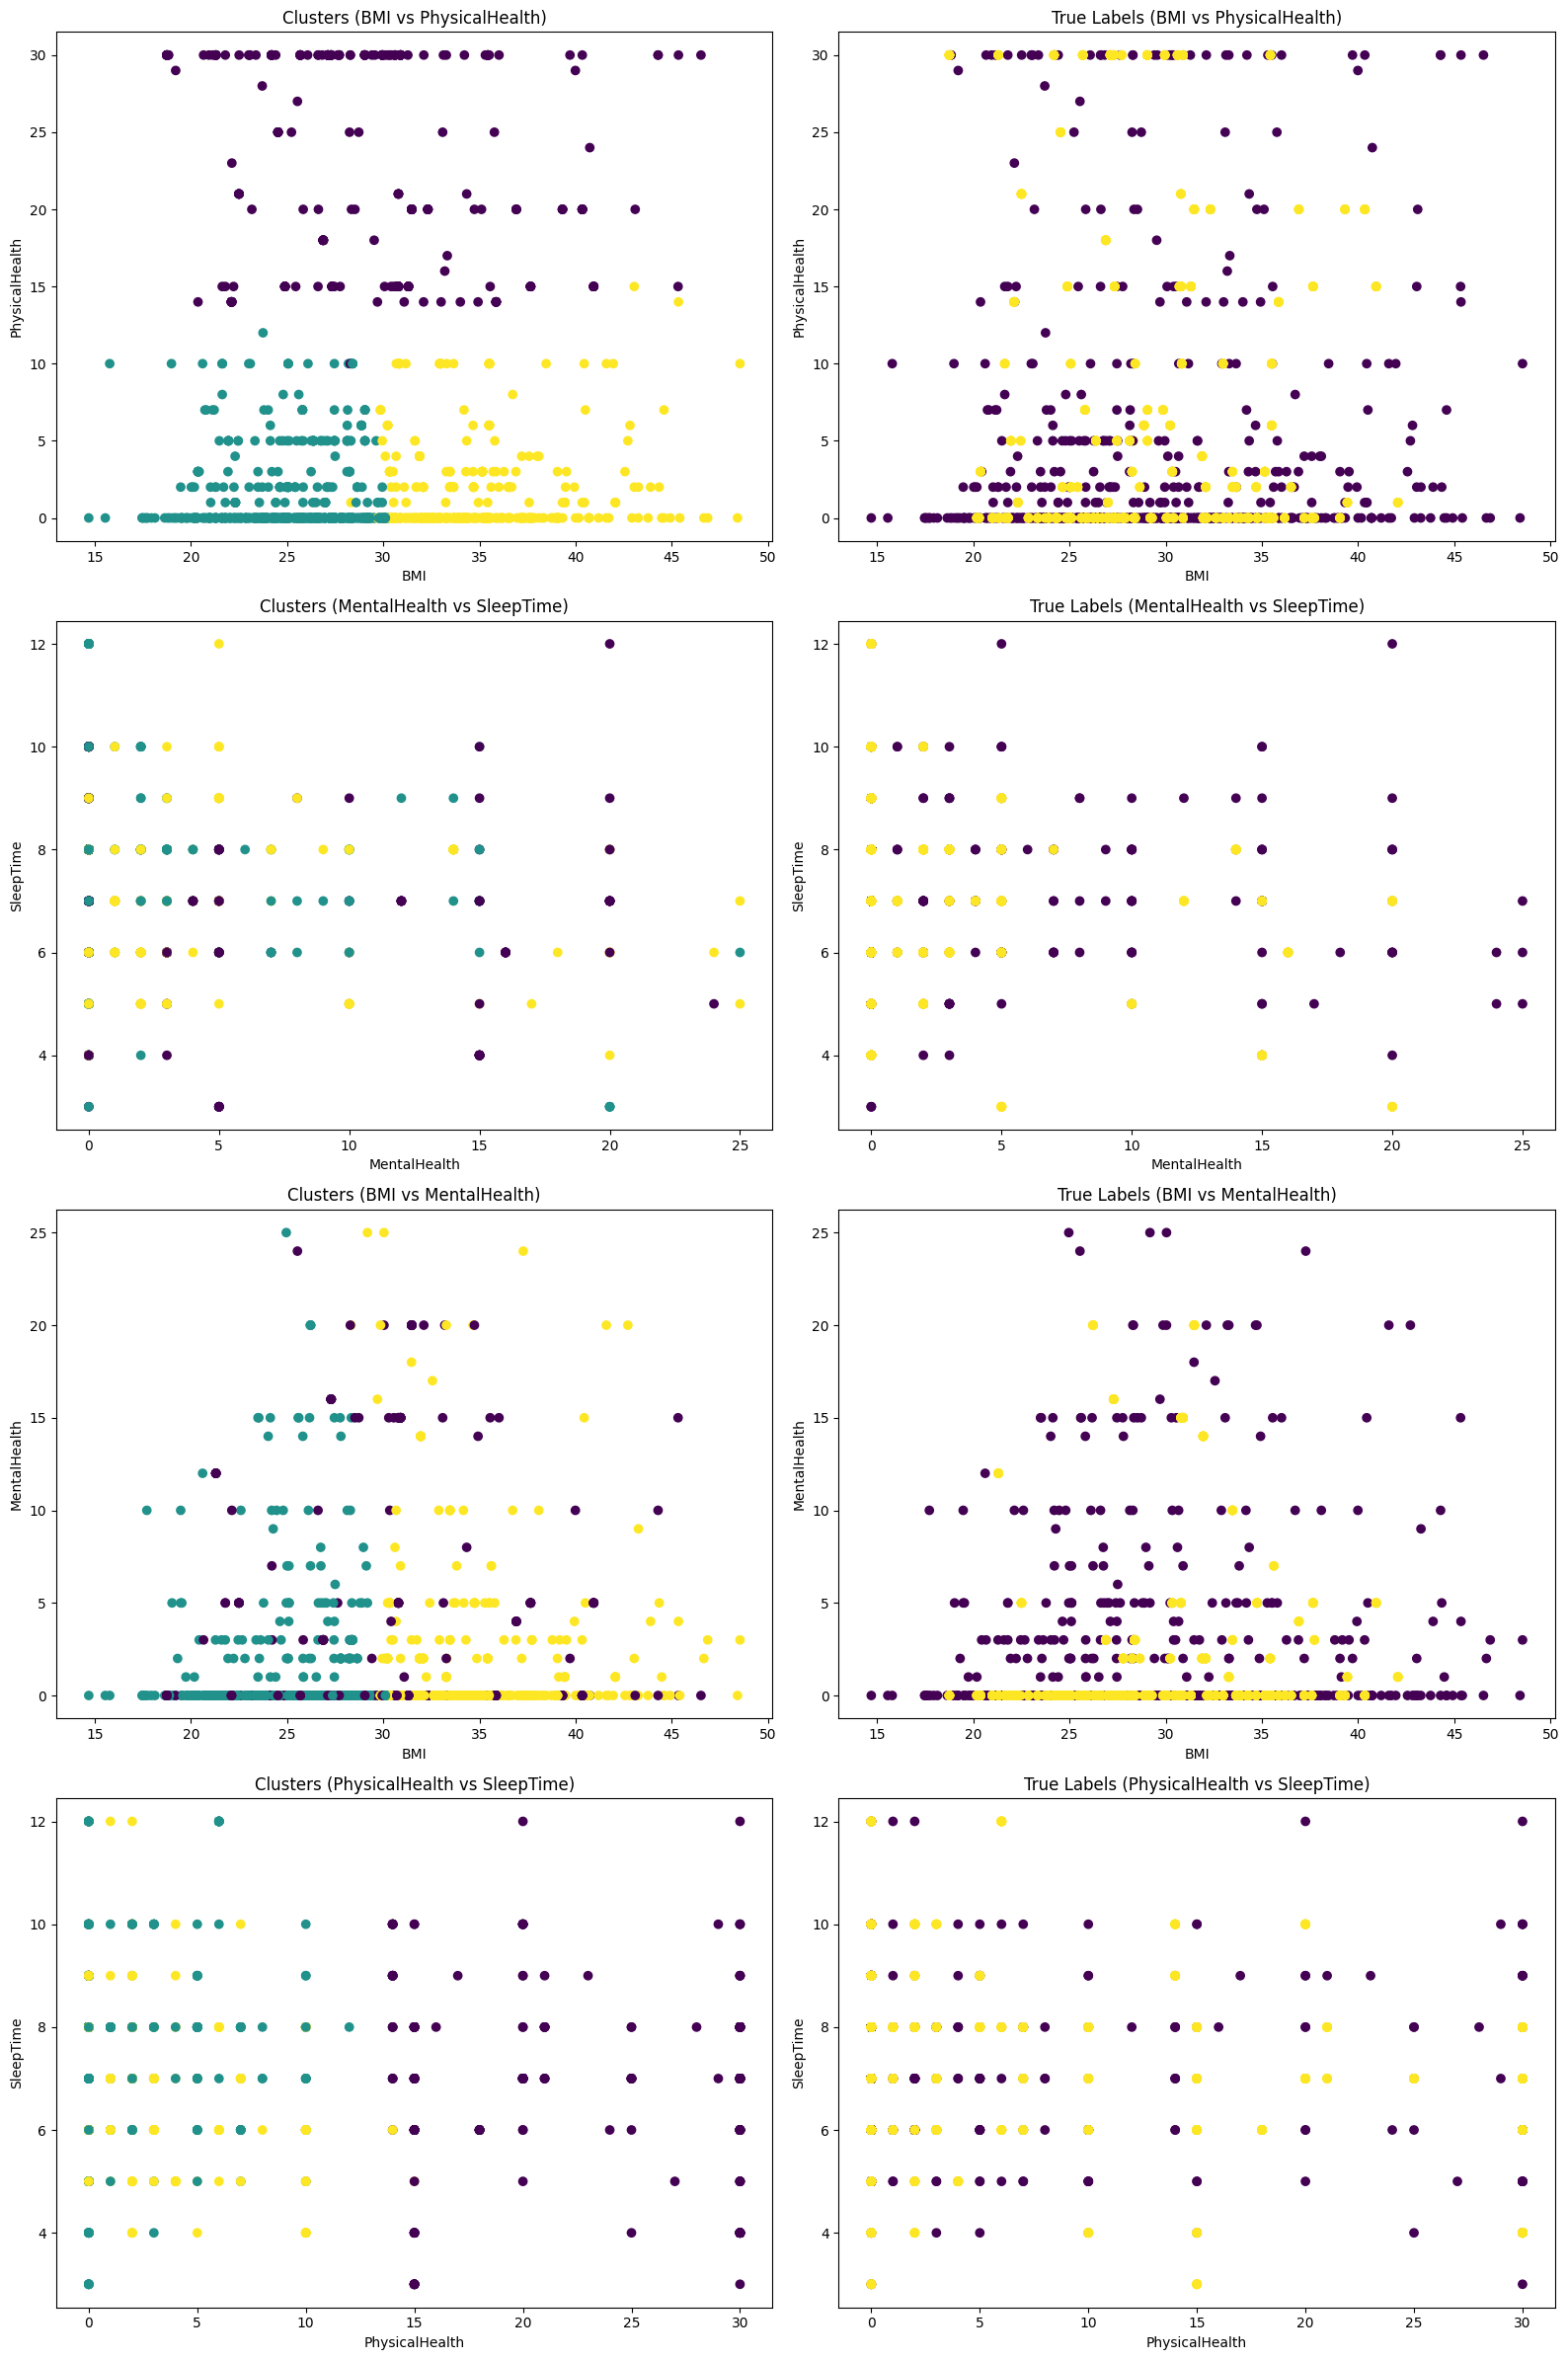

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def draw_data_2d(data, feature_x, feature_y, labels, subplot):
    subplot.scatter(data.iloc[:, feature_x], data.iloc[:, feature_y], c=labels, cmap='viridis')
    subplot.set_xlabel(data.columns[feature_x])
    subplot.set_ylabel(data.columns[feature_y])

X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
result = kmeans.fit_predict(X)

plt.figure(figsize=(16, 24))

plt.subplot(4, 2, 1)
draw_data_2d(X, 0, 1, result, plt.subplot(4, 2, 1))
plt.title('Clusters (BMI vs PhysicalHealth)')

plt.subplot(4, 2, 2)
draw_data_2d(X, 0, 1, df['HeartDisease'], plt.subplot(4, 2, 2))
plt.title('True Labels (BMI vs PhysicalHealth)')

plt.subplot(4, 2, 3)
draw_data_2d(X, 2, 3, result, plt.subplot(4, 2, 3))
plt.title('Clusters (MentalHealth vs SleepTime)')

plt.subplot(4, 2, 4)
draw_data_2d(X, 2, 3, df['HeartDisease'], plt.subplot(4, 2, 4))
plt.title('True Labels (MentalHealth vs SleepTime)')

plt.subplot(4, 2, 5)
draw_data_2d(X, 0, 2, result, plt.subplot(4, 2, 5))
plt.title('Clusters (BMI vs MentalHealth)')

plt.subplot(4, 2, 6)
draw_data_2d(X, 0, 2, df['HeartDisease'], plt.subplot(4, 2, 6))
plt.title('True Labels (BMI vs MentalHealth)')

plt.subplot(4, 2, 7)
draw_data_2d(X, 1, 3, result, plt.subplot(4, 2, 7))
plt.title('Clusters (PhysicalHealth vs SleepTime)')

plt.subplot(4, 2, 8)
draw_data_2d(X, 1, 3, df['HeartDisease'], plt.subplot(4, 2, 8))
plt.title('True Labels (PhysicalHealth vs SleepTime)')

plt.tight_layout()
plt.show()

Cluster 1 (482):
5, 7, 20, 22, 24, 27, 28, 36, 39, 44, 46, 49, 56, 62, 65, 66, 67, 70, 71, 78, 80, 83, 97, 103, 105, 114, 115, 119, 121, 124, 130, 135, 137, 139, 140, 143, 148, 150, 153, 154, 155, 156, 159, 161, 162, 164, 168, 192, 197, 198, 204, 206, 211, 213, 214, 217, 224, 226, 227, 233, 237, 245, 249, 253, 255, 256, 259, 260, 261, 262, 264, 271, 273, 278, 281, 283, 284, 290, 291, 296, 301, 303, 307, 309, 312, 314, 315, 321, 323, 329, 330, 331, 332, 335, 337, 340, 342, 351, 352, 355, 356, 358, 360, 369, 376, 379, 380, 382, 385, 386, 390, 392, 398, 404, 405, 406, 411, 417, 419, 420, 422, 423, 427, 432, 435, 440, 441, 442, 446, 447, 450, 451, 453, 455, 456, 458, 460, 462, 466, 471, 474, 477, 486, 493, 495, 503, 510, 512, 516, 521, 523, 524, 531, 536, 537, 538, 543, 544, 545, 557, 567, 571, 573, 576, 578, 582, 587, 589, 591, 592, 595, 597, 598, 600, 603, 605, 608, 612, 613, 617, 620, 621, 624, 633, 640, 643, 646, 647, 651, 652, 653, 654, 655, 656, 664, 667, 669, 674, 677, 682, 692, 694

array([[34.91558091,  2.09543568,  1.86929461,  7.1659751 ],
       [29.02968531, 23.47202797,  3.75524476,  6.93356643],
       [25.48561275,  1.03186275,  0.88480392,  7.48039216]])

0       0
1       0
2       0
3       1
4       0
       ..
1579    1
1580    1
1581    1
1582    1
1583    1
Name: HeartDisease, Length: 1584, dtype: int64

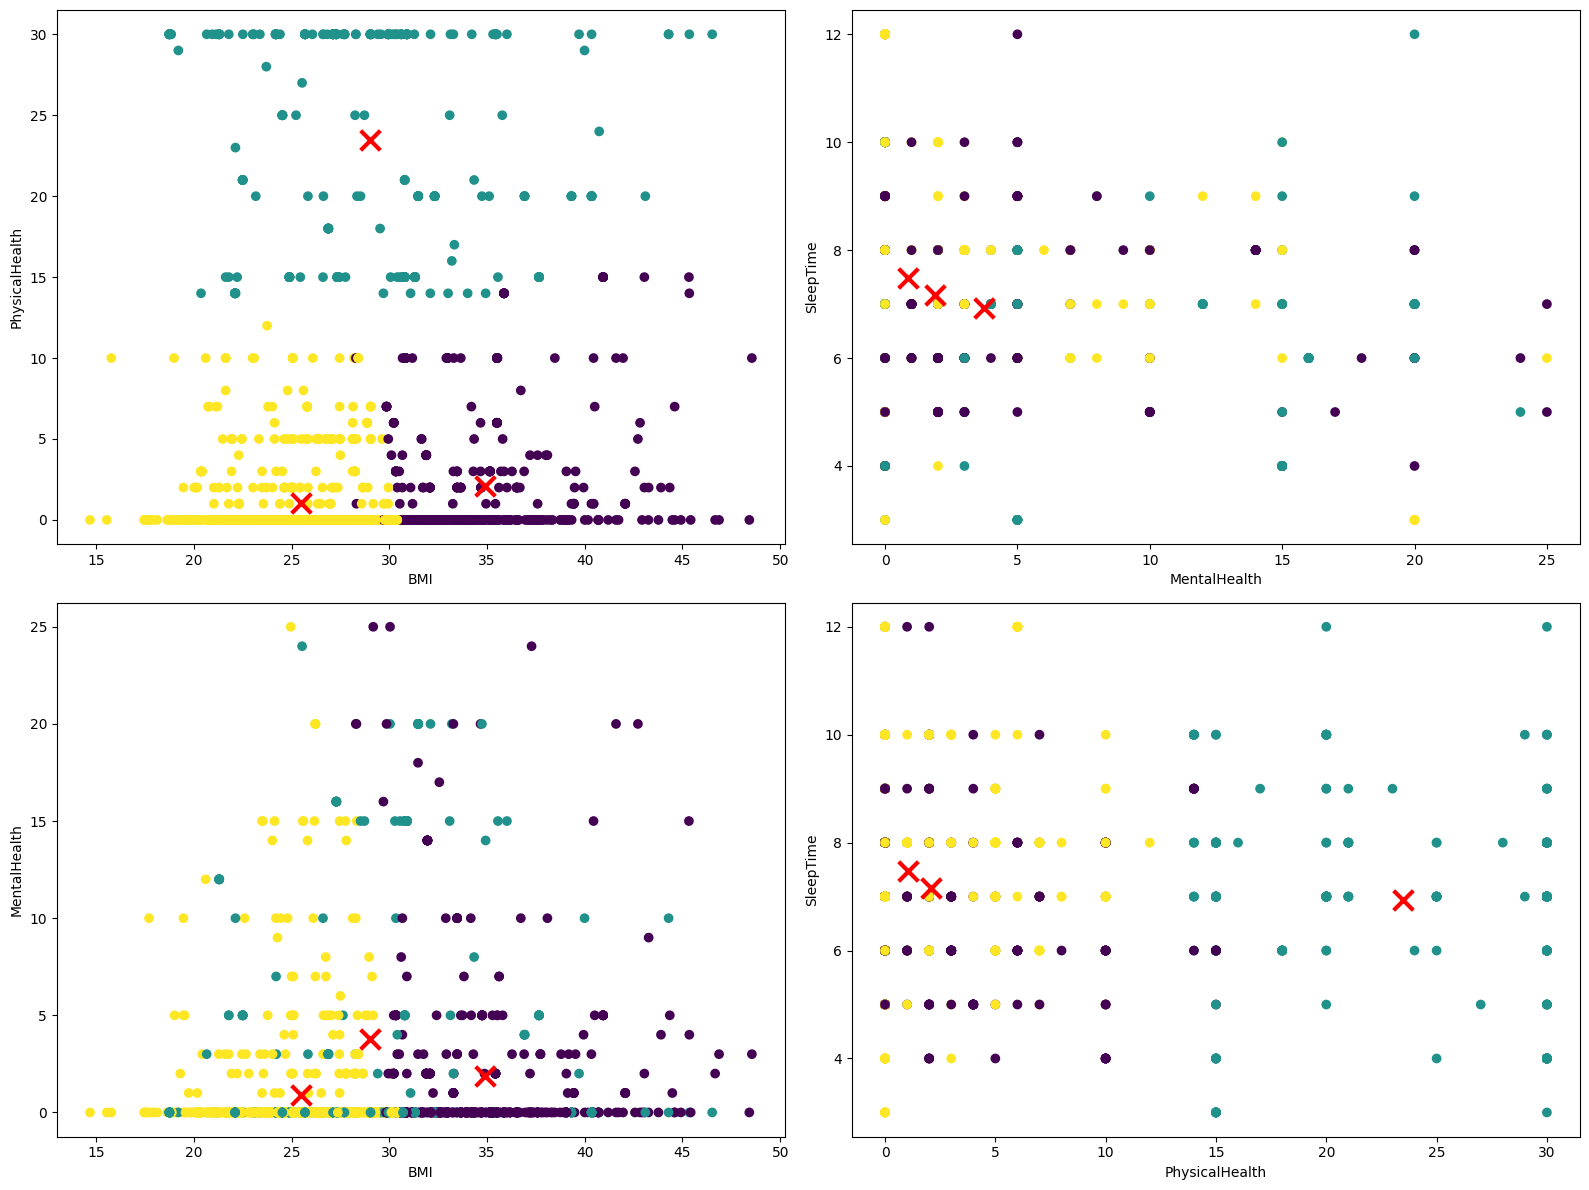

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def run_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    return labels, centers

def print_cluster_result(data, n_clusters, labels):
    for i in range(n_clusters):
        cluster_indices = [index for index, label in enumerate(labels) if label == i]
        print(f"Cluster {i+1} ({len(cluster_indices)}):")
        print(", ".join(map(str, cluster_indices)))
        print("--------")

def draw_cluster_results(data, feature_x, feature_y, labels, centers, subplot):
    subplot.scatter(data.iloc[:, feature_x], data.iloc[:, feature_y], c=labels, cmap='viridis')
    subplot.scatter(centers[:, feature_x], centers[:, feature_y], marker='x', s=200, linewidths=3, color='r')
    subplot.set_xlabel(data.columns[feature_x])
    subplot.set_ylabel(data.columns[feature_y])

random_state = 9
n_clusters = 3
labels, centers = run_kmeans(X, n_clusters, random_state)
print_cluster_result(X, n_clusters, labels)
display(centers)
display(df['HeartDisease'])

plt.figure(figsize=(16, 12))
draw_cluster_results(X, 0, 1, labels, centers, plt.subplot(2, 2, 1))
draw_cluster_results(X, 2, 3, labels, centers, plt.subplot(2, 2, 2))
draw_cluster_results(X, 0, 2, labels, centers, plt.subplot(2, 2, 3))
draw_cluster_results(X, 1, 3, labels, centers, plt.subplot(2, 2, 4))
plt.tight_layout()
plt.show()

In [69]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)

print(reduced_data)


[[-5.84622064 -8.51798399]
 [-5.7037399  -4.66415042]
 [21.96082207 -6.57635165]
 ...
 [24.02481154 -4.69225678]
 [24.02481154 -4.69225678]
 [-5.69844894 -3.81424256]]


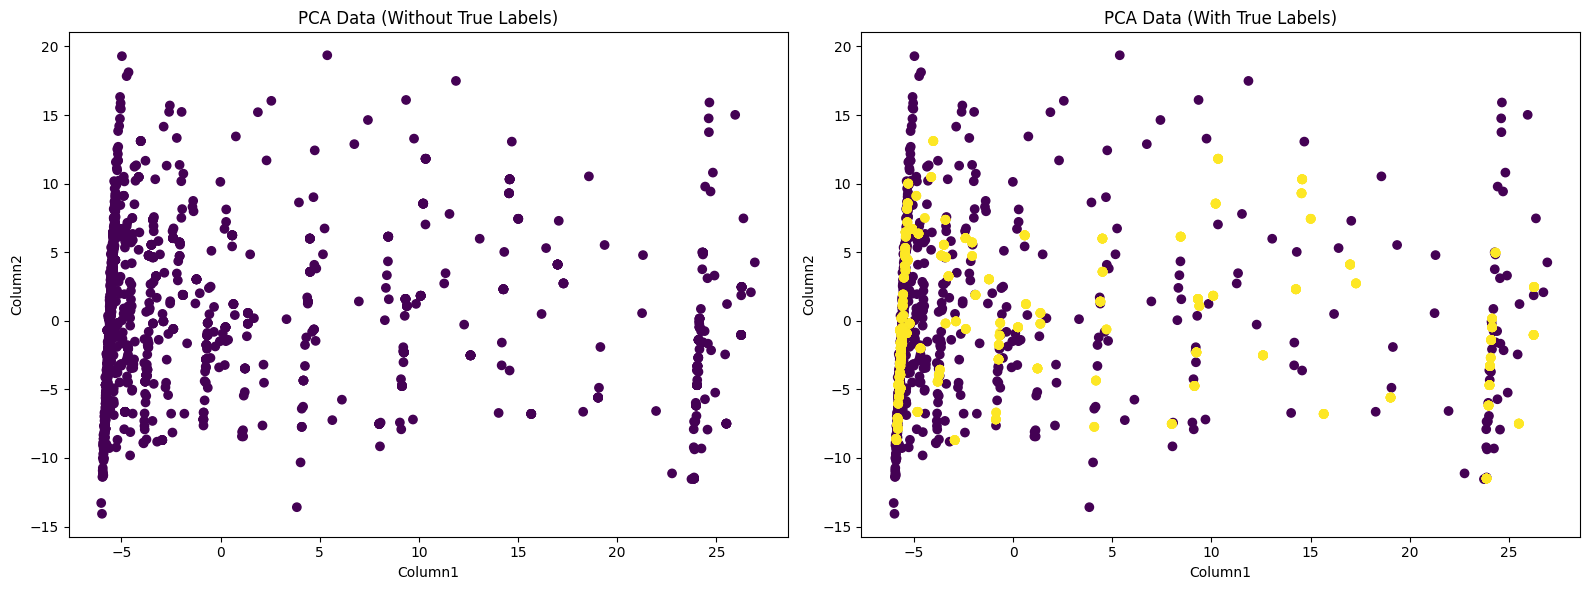

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(16, 6))

draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels=[0] * len(reduced_data),  
    subplot=plt.subplot(1, 2, 1),
)
plt.title('PCA Data (Without True Labels)')

draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    df['HeartDisease'],
    plt.subplot(1, 2, 2),
)
plt.title('PCA Data (With True Labels)')

plt.tight_layout()
plt.show()

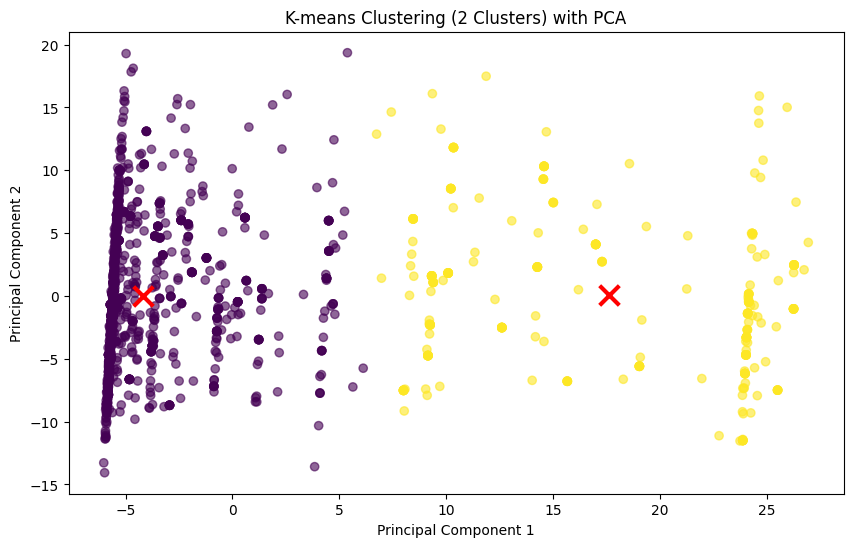

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def fit_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    return kmeans

def draw_clusters(data, kmeans):
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering (2 Clusters) with PCA')
    plt.show()

kmeans = fit_kmeans(reduced_data, 2, random_state)
draw_clusters(reduced_data, kmeans)

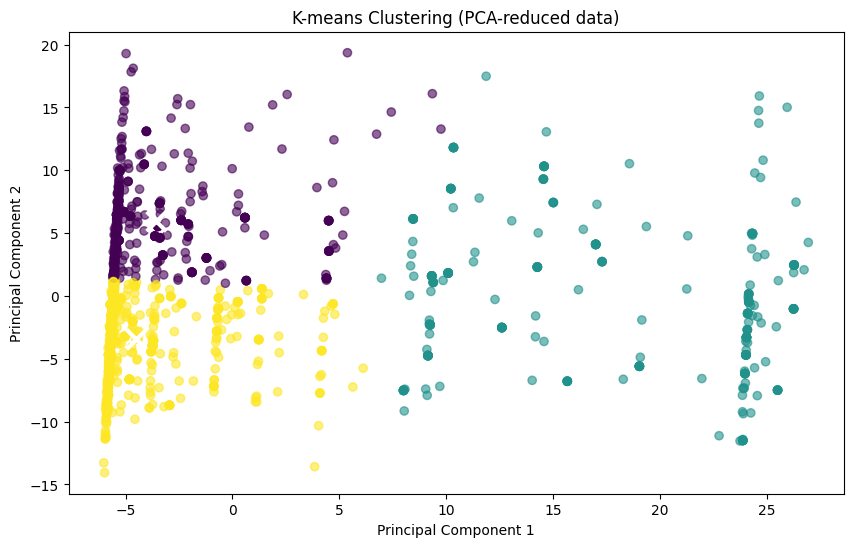

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def fit_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    return kmeans

def draw_clusters(data, kmeans):
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='white')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering (PCA-reduced data)')
    plt.show()

kmeans = fit_kmeans(reduced_data, 3, random_state)
draw_clusters(reduced_data, kmeans)

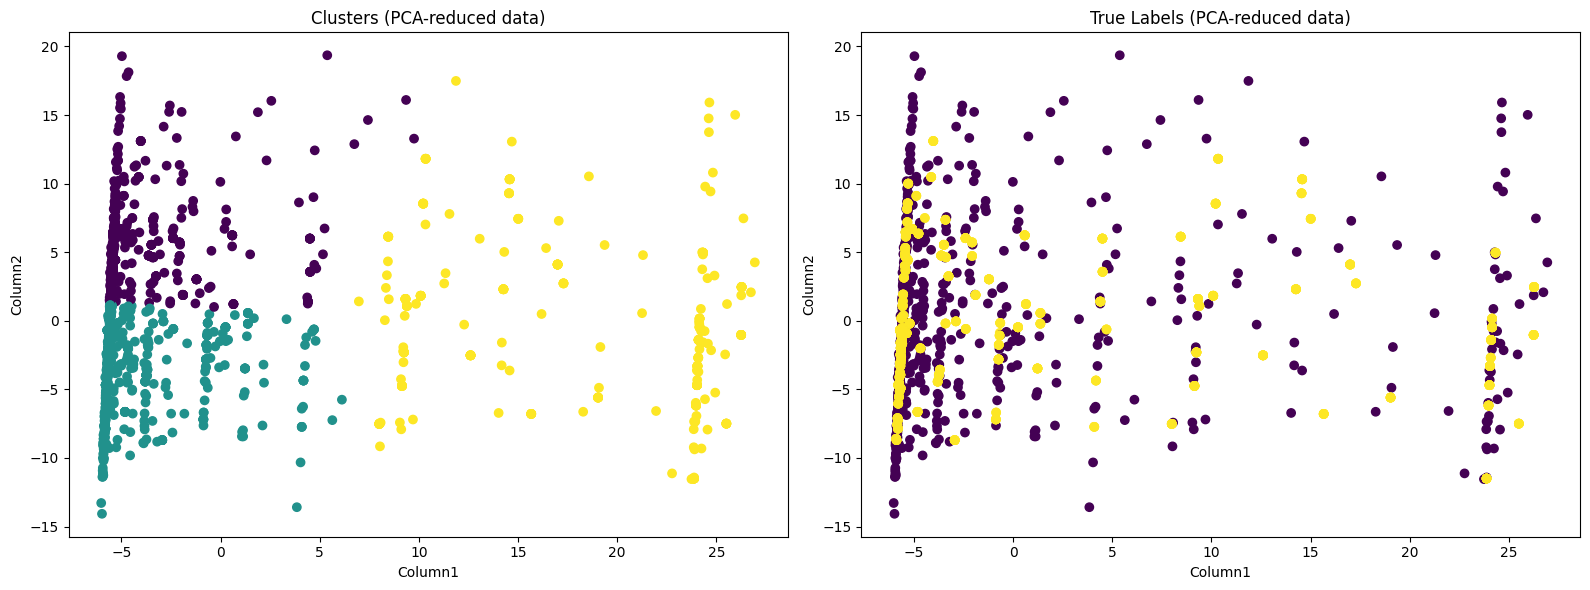

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

labels = [2 if val == 1 else 1 if val == 2 else val for val in kmeans.labels_]

plt.figure(figsize=(16, 6))

draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels,
    plt.subplot(1, 2, 1),
)
plt.title('Clusters (PCA-reduced data)')

draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    df['HeartDisease'],
    plt.subplot(1, 2, 2),
)
plt.title('True Labels (PCA-reduced data)')

plt.tight_layout()
plt.show()

Clusters Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Inertias: [188339.3786248587, 71215.42904037607, 45411.799539507614, 30940.91324871111, 25825.44168747253, 20648.77565717782, 18422.523745341146, 16603.274611675115, 14473.722814510891, 12572.350229277426]


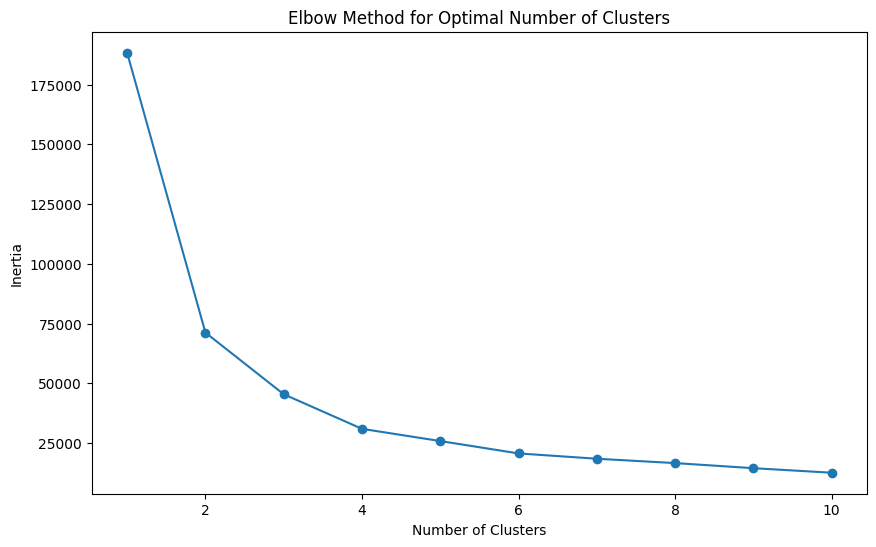

In [74]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_clusters_inertia(data, random_state, max_clusters=10):
    inertias = []
    clusters_range = range(1, max_clusters + 1)
    
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    return inertias, clusters_range

def draw_elbow_diagram(inertias, clusters_range):
    plt.figure(figsize=(10, 6))
    plt.plot(clusters_range, inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

random_state = 42
max_clusters = 10

inertias, clusters_range = get_clusters_inertia(reduced_data, random_state, max_clusters)

print("Clusters Range:", list(clusters_range))
print("Inertias:", inertias)

draw_elbow_diagram(inertias, clusters_range)

Clusters Range: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Silhouette Scores: [np.float64(0.4061232673047139), np.float64(0.5161974215603345), np.float64(0.41688933894376207), np.float64(0.4317880554700233), np.float64(0.43244492414105384), np.float64(0.4520139981348476), np.float64(0.42287542835353636), np.float64(0.4290740936057577), np.float64(0.45589103429651956)]


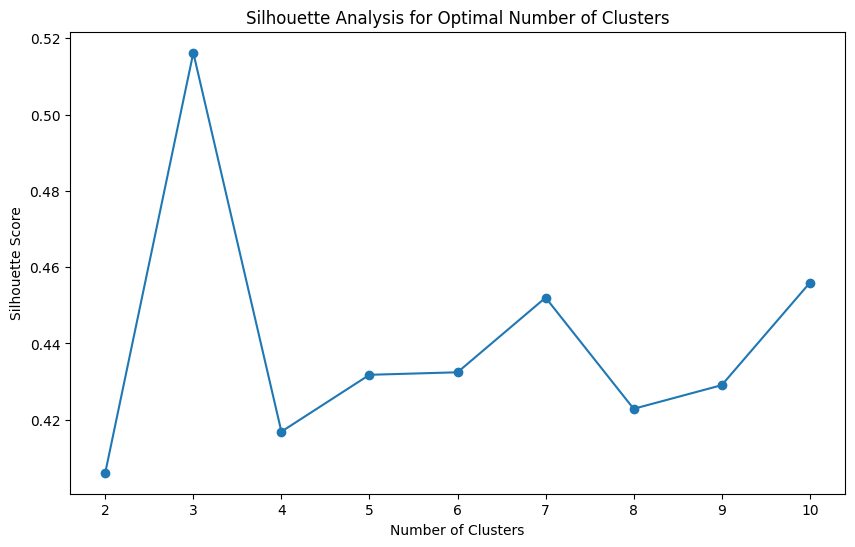

In [75]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def get_clusters_silhouette_scores(data, random_state, max_clusters=10):
    silhouette_scores = []
    clusters_range = range(2, max_clusters + 1)
    
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    return silhouette_scores, clusters_range

def draw_silhouettes_diagram(silhouette_scores, clusters_range):
    plt.figure(figsize=(10, 6))
    plt.plot(clusters_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal Number of Clusters')
    plt.show()

random_state = 42
max_clusters = 10

scaler = StandardScaler()
reduced_data = scaler.fit_transform(reduced_data)

silhouette_scores, clusters_range = get_clusters_silhouette_scores(reduced_data, random_state, max_clusters)

print("Clusters Range:", list(clusters_range))
print("Silhouette Scores:", silhouette_scores)

draw_silhouettes_diagram(silhouette_scores, clusters_range)

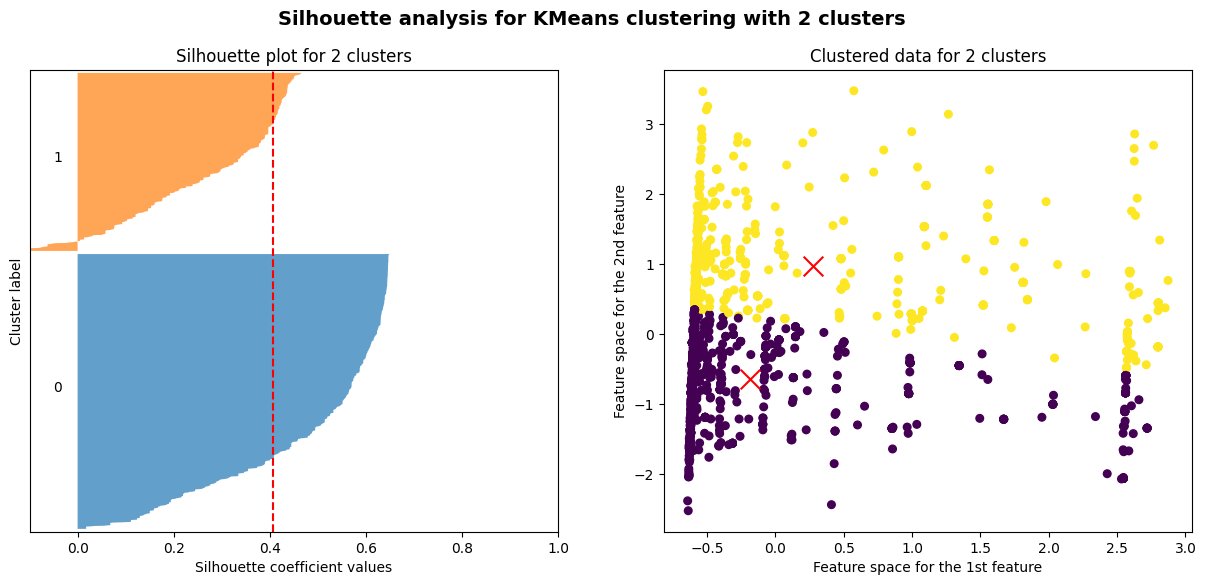

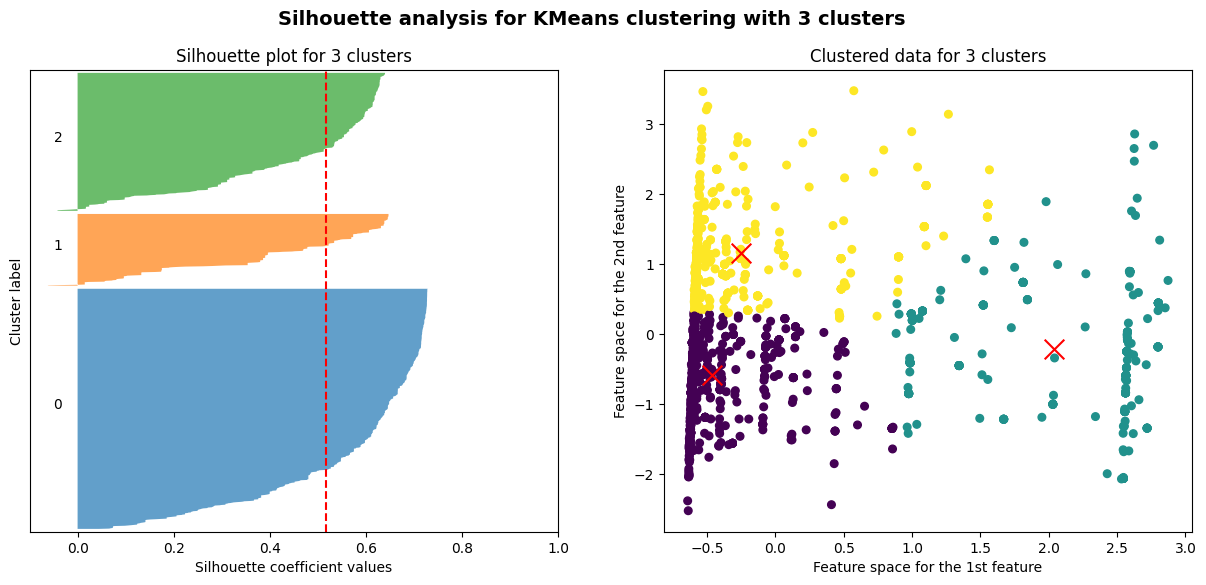

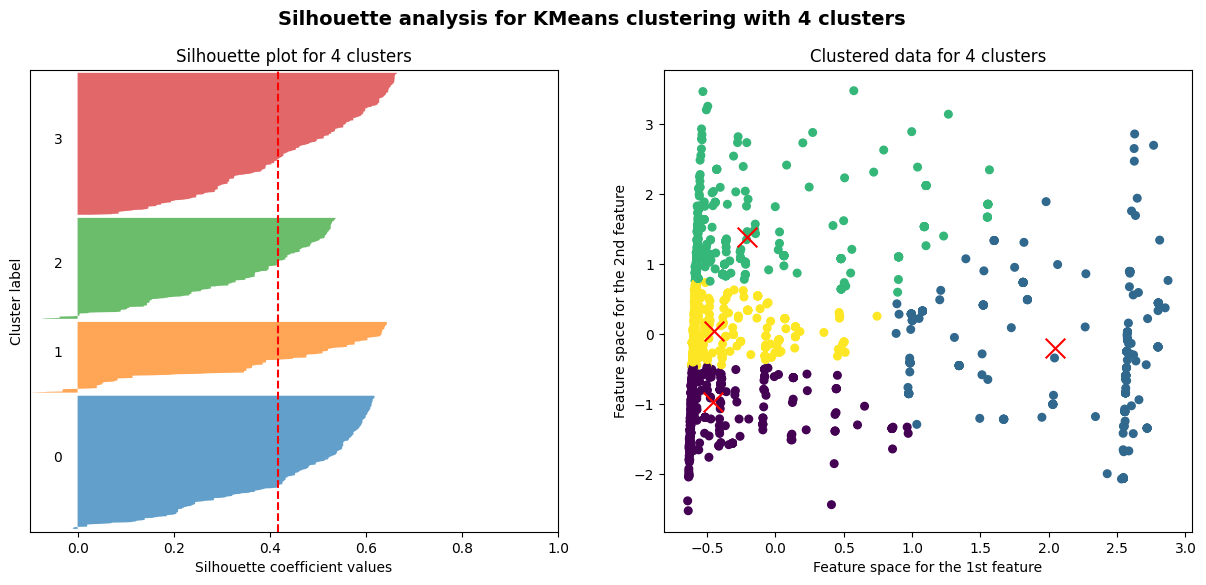

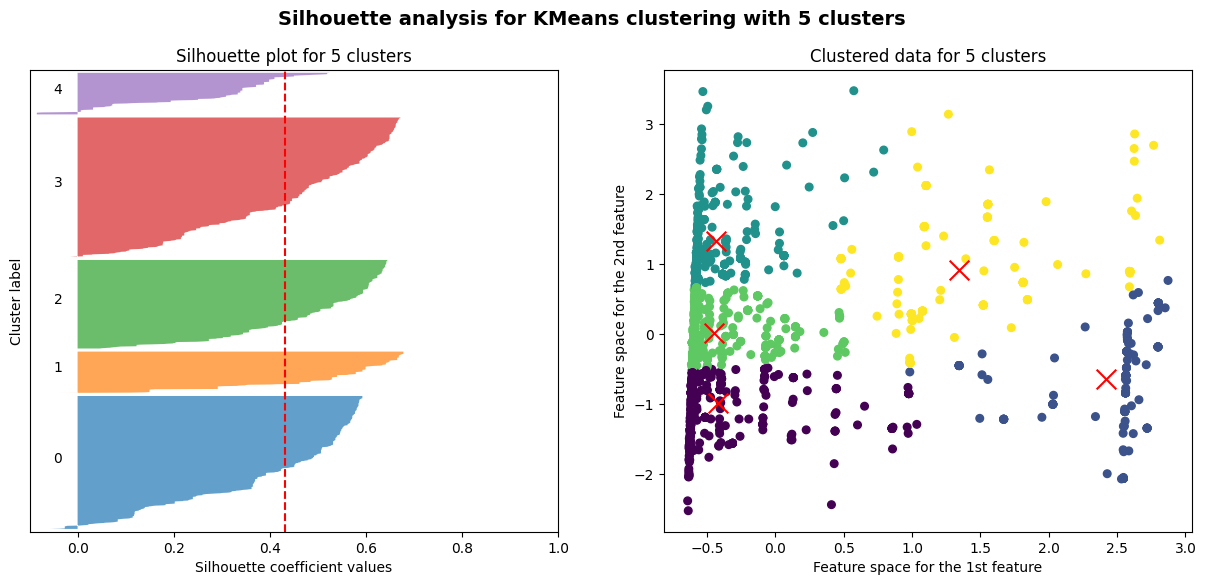

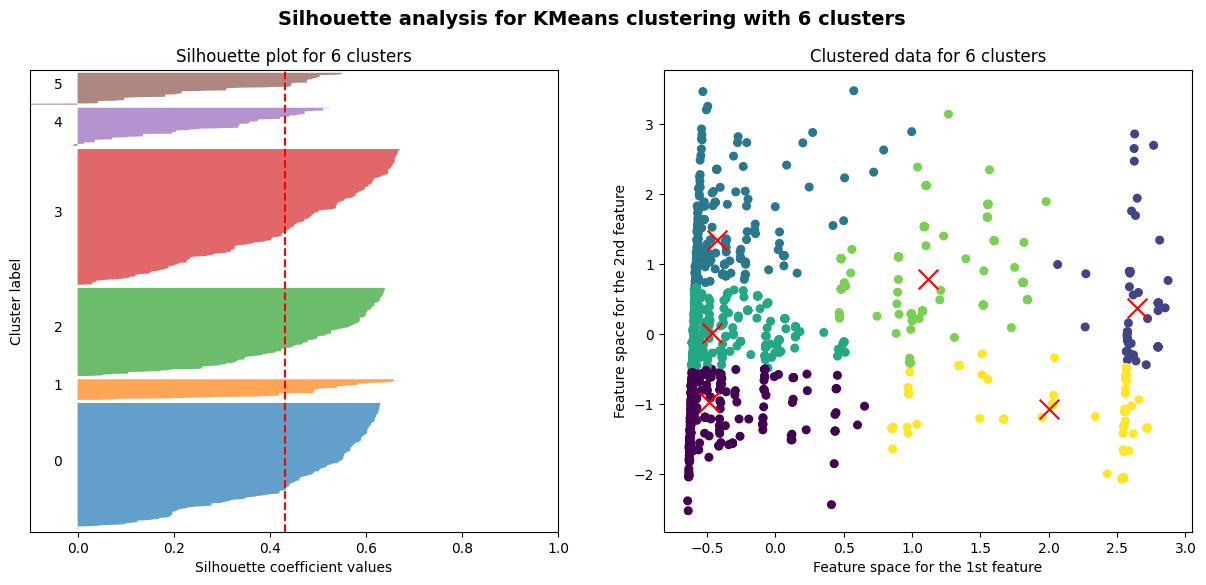

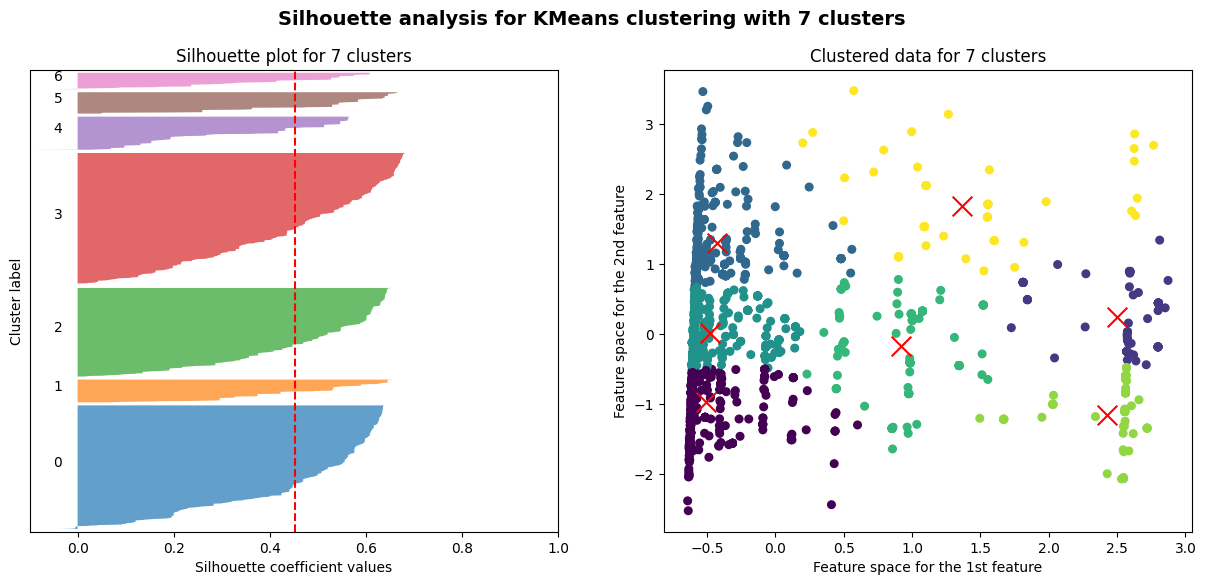

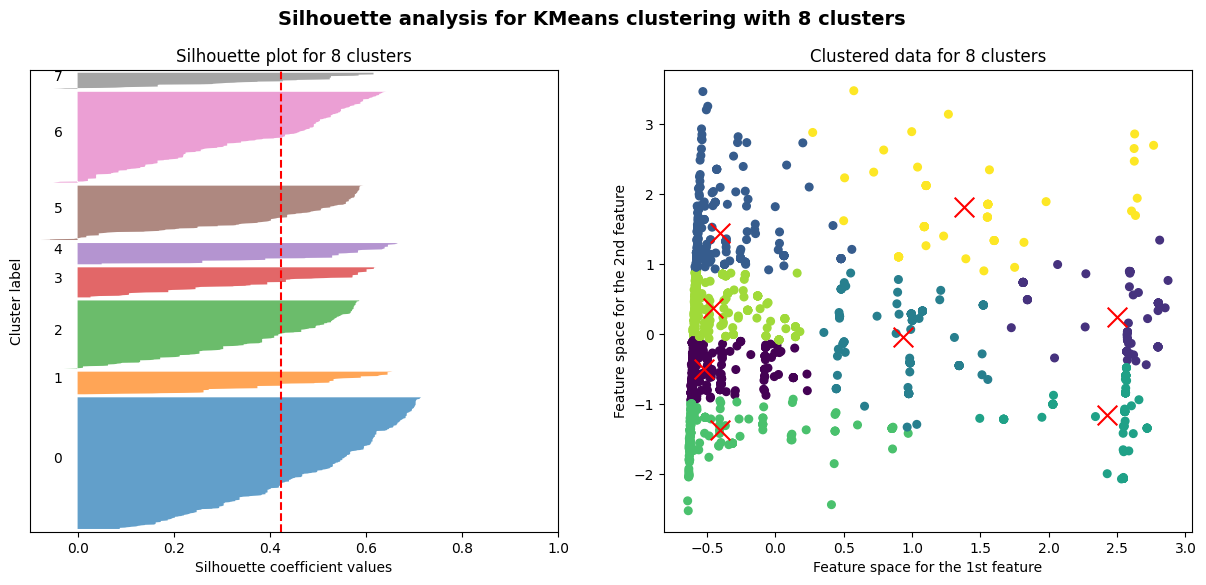

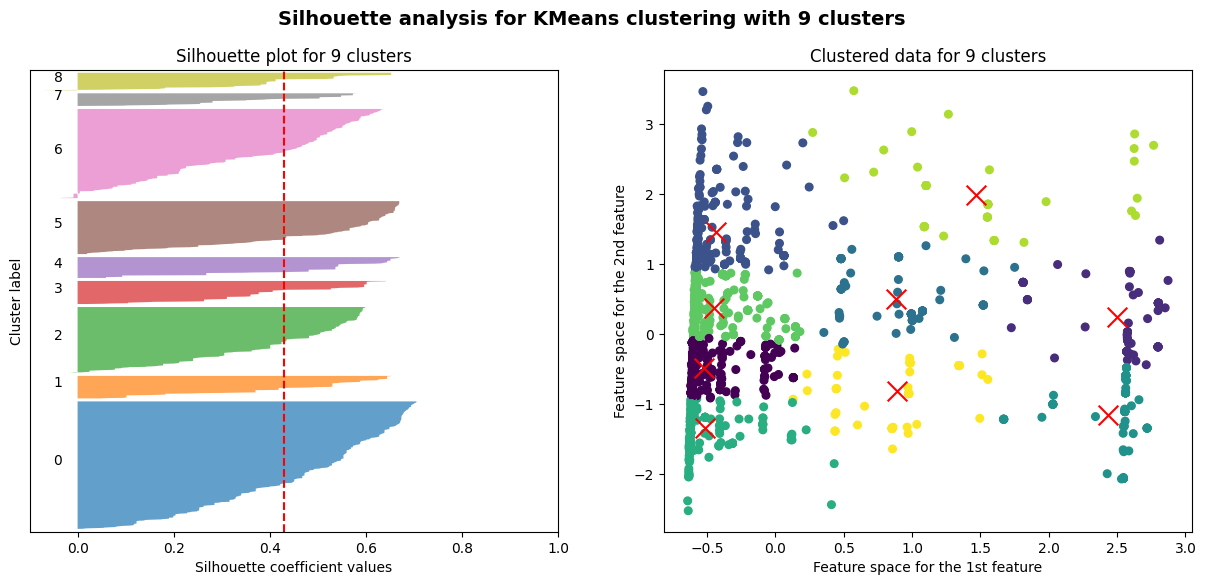

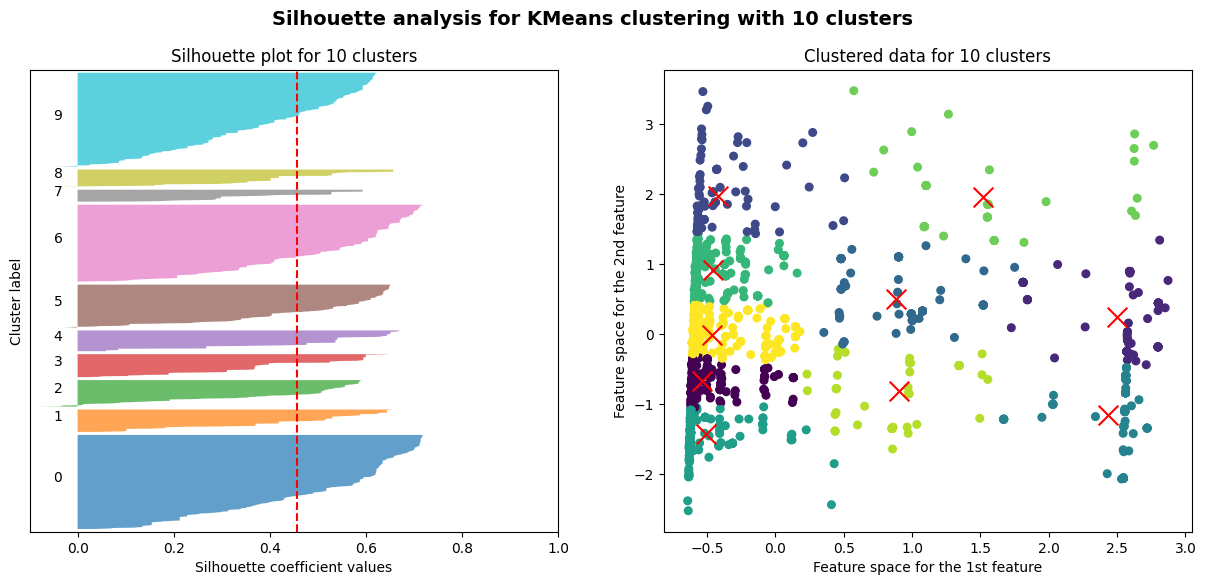

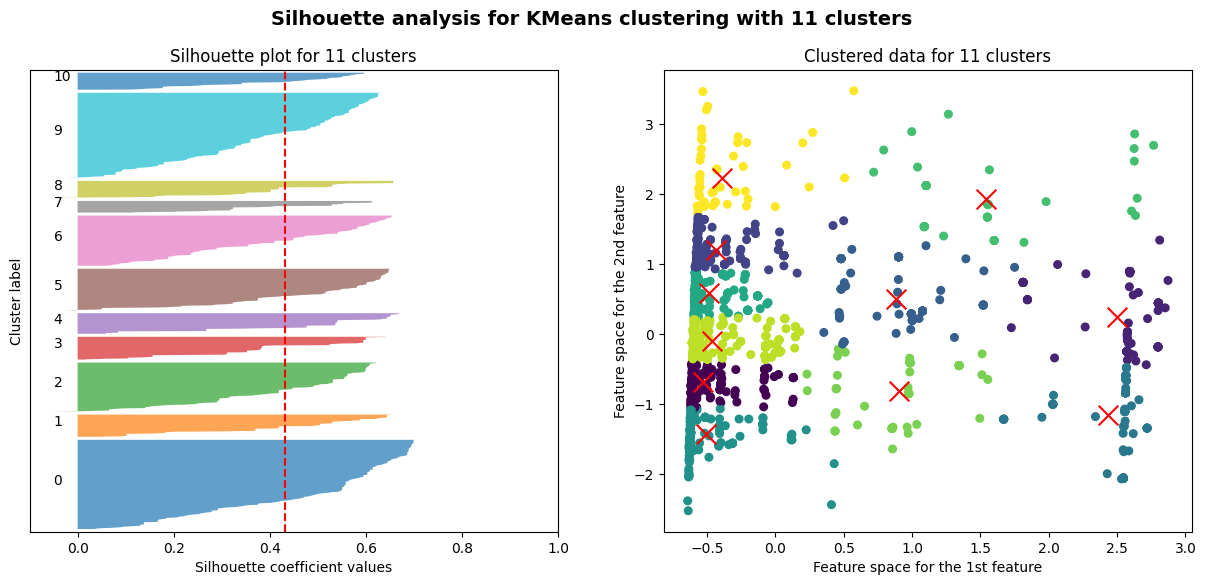

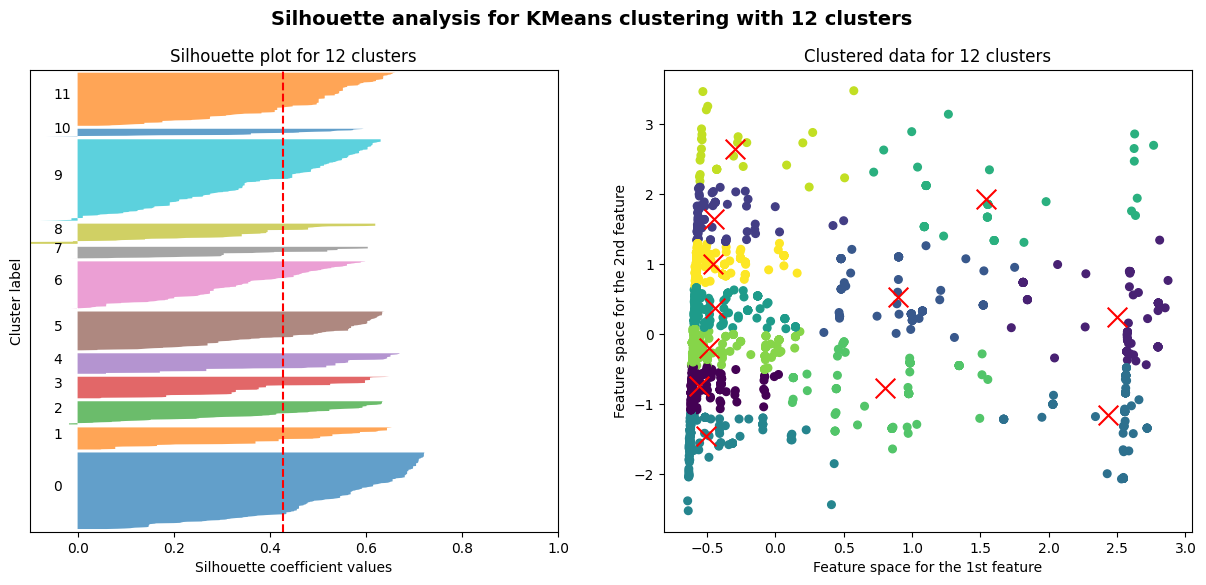

In [76]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

def get_clusters_silhouettes(data, random_state):
    max_clusters = min(12, int(math.sqrt(len(data))))
    silhouettes = []
    
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouettes.append((n_clusters, silhouette_avg, cluster_labels, kmeans.cluster_centers_))
    
    return silhouettes

def draw_silhouettes(data, silhouettes):
    for n_clusters, silhouette_avg, cluster_labels, centers in silhouettes:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
        silhouette_values = silhouette_samples(data, cluster_labels)
        y_lower = 10
        
        for i in range(n_clusters):
            cluster_silhouette_values = silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()
            cluster_size = cluster_silhouette_values.shape[0]
            y_upper = y_lower + cluster_size
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
            y_lower = y_upper + 10
        
        ax1.set_title("Silhouette plot for {} clusters".format(n_clusters))
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        
        ax2.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30)
        ax2.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=1)
        ax2.set_title("Clustered data for {} clusters".format(n_clusters))
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        
        plt.suptitle(("Silhouette analysis for KMeans clustering with {} clusters".format(n_clusters)),
                     fontsize=14, fontweight='bold')
        plt.show()

random_state = 42

silhouettes = get_clusters_silhouettes(reduced_data, random_state)

draw_silhouettes(reduced_data, silhouettes)